# Cement Strength Prediction.......



In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
%matplotlib inline

In [155]:
cd=pd.read_csv('04-Concrete_Data_V1.0 (1).csv')
cd

,Cement,Slag,Flyash,Water,SuperPlasticizer,CoarseAggregate,FineAggregate,Age,CSinMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [156]:
cd=cd.rename({'CSinMPa' : 'Concrete Compressive Strength in MPa'}, axis = 1)

In [157]:
cd

,Cement,Slag,Flyash,Water,SuperPlasticizer,CoarseAggregate,FineAggregate,Age,Concrete Compressive Strength in MPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [158]:
cd.isnull().sum()

Cement                                  0
Slag                                    0
Flyash                                  0
Water                                   0
SuperPlasticizer                        0
CoarseAggregate                         0
FineAggregate                           0
Age                                     0
Concrete Compressive Strength in MPa    0
dtype: int64

In [159]:
cd.describe()

,Cement,Slag,Flyash,Water,SuperPlasticizer,CoarseAggregate,FineAggregate,Age,Concrete Compressive Strength in MPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [160]:
cd.columns


Index(['Cement', 'Slag', 'Flyash', 'Water', 'SuperPlasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age',
       'Concrete Compressive Strength in MPa'],
      dtype='object')

In [161]:
cd.corr()

,Cement,Slag,Flyash,Water,SuperPlasticizer,CoarseAggregate,FineAggregate,Age,Concrete Compressive Strength in MPa
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Flyash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
SuperPlasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
CoarseAggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
FineAggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Concrete Compressive Strength in MPa,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


<AxesSubplot:>

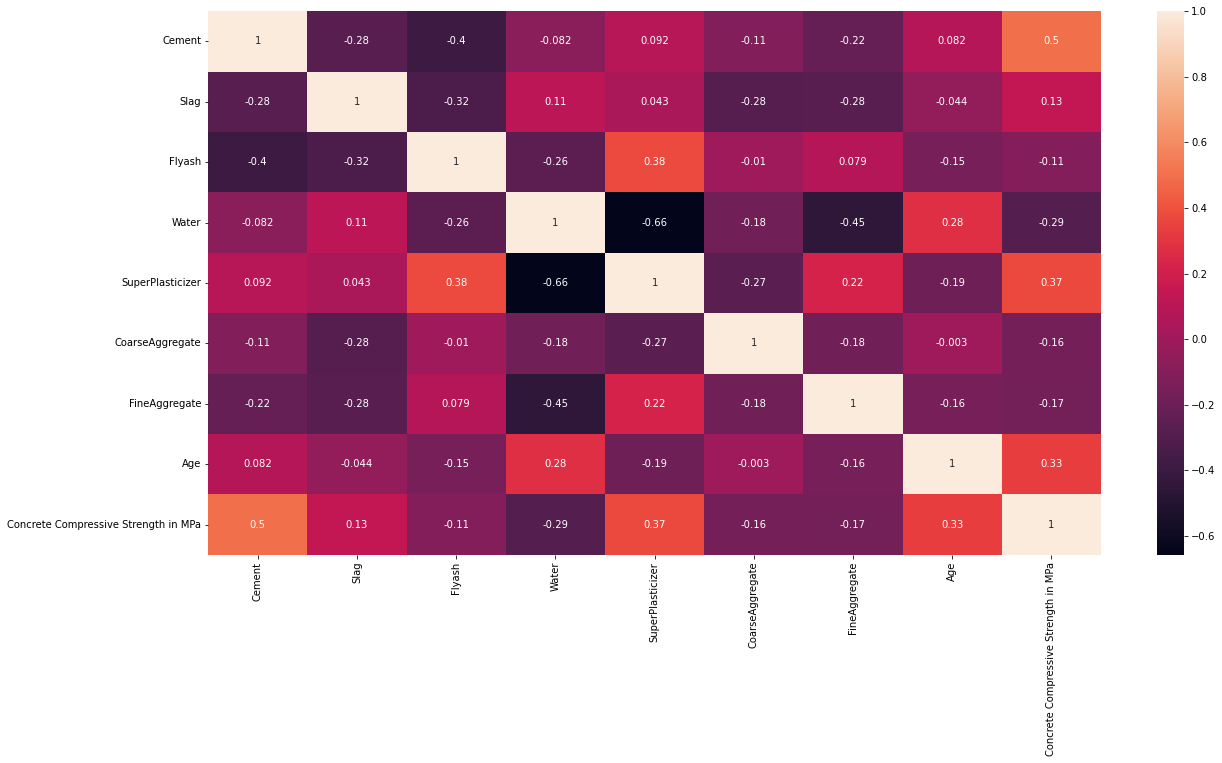

In [162]:
plt.figure(figsize=(20,10))
sns.heatmap(cd.corr(), annot=True)

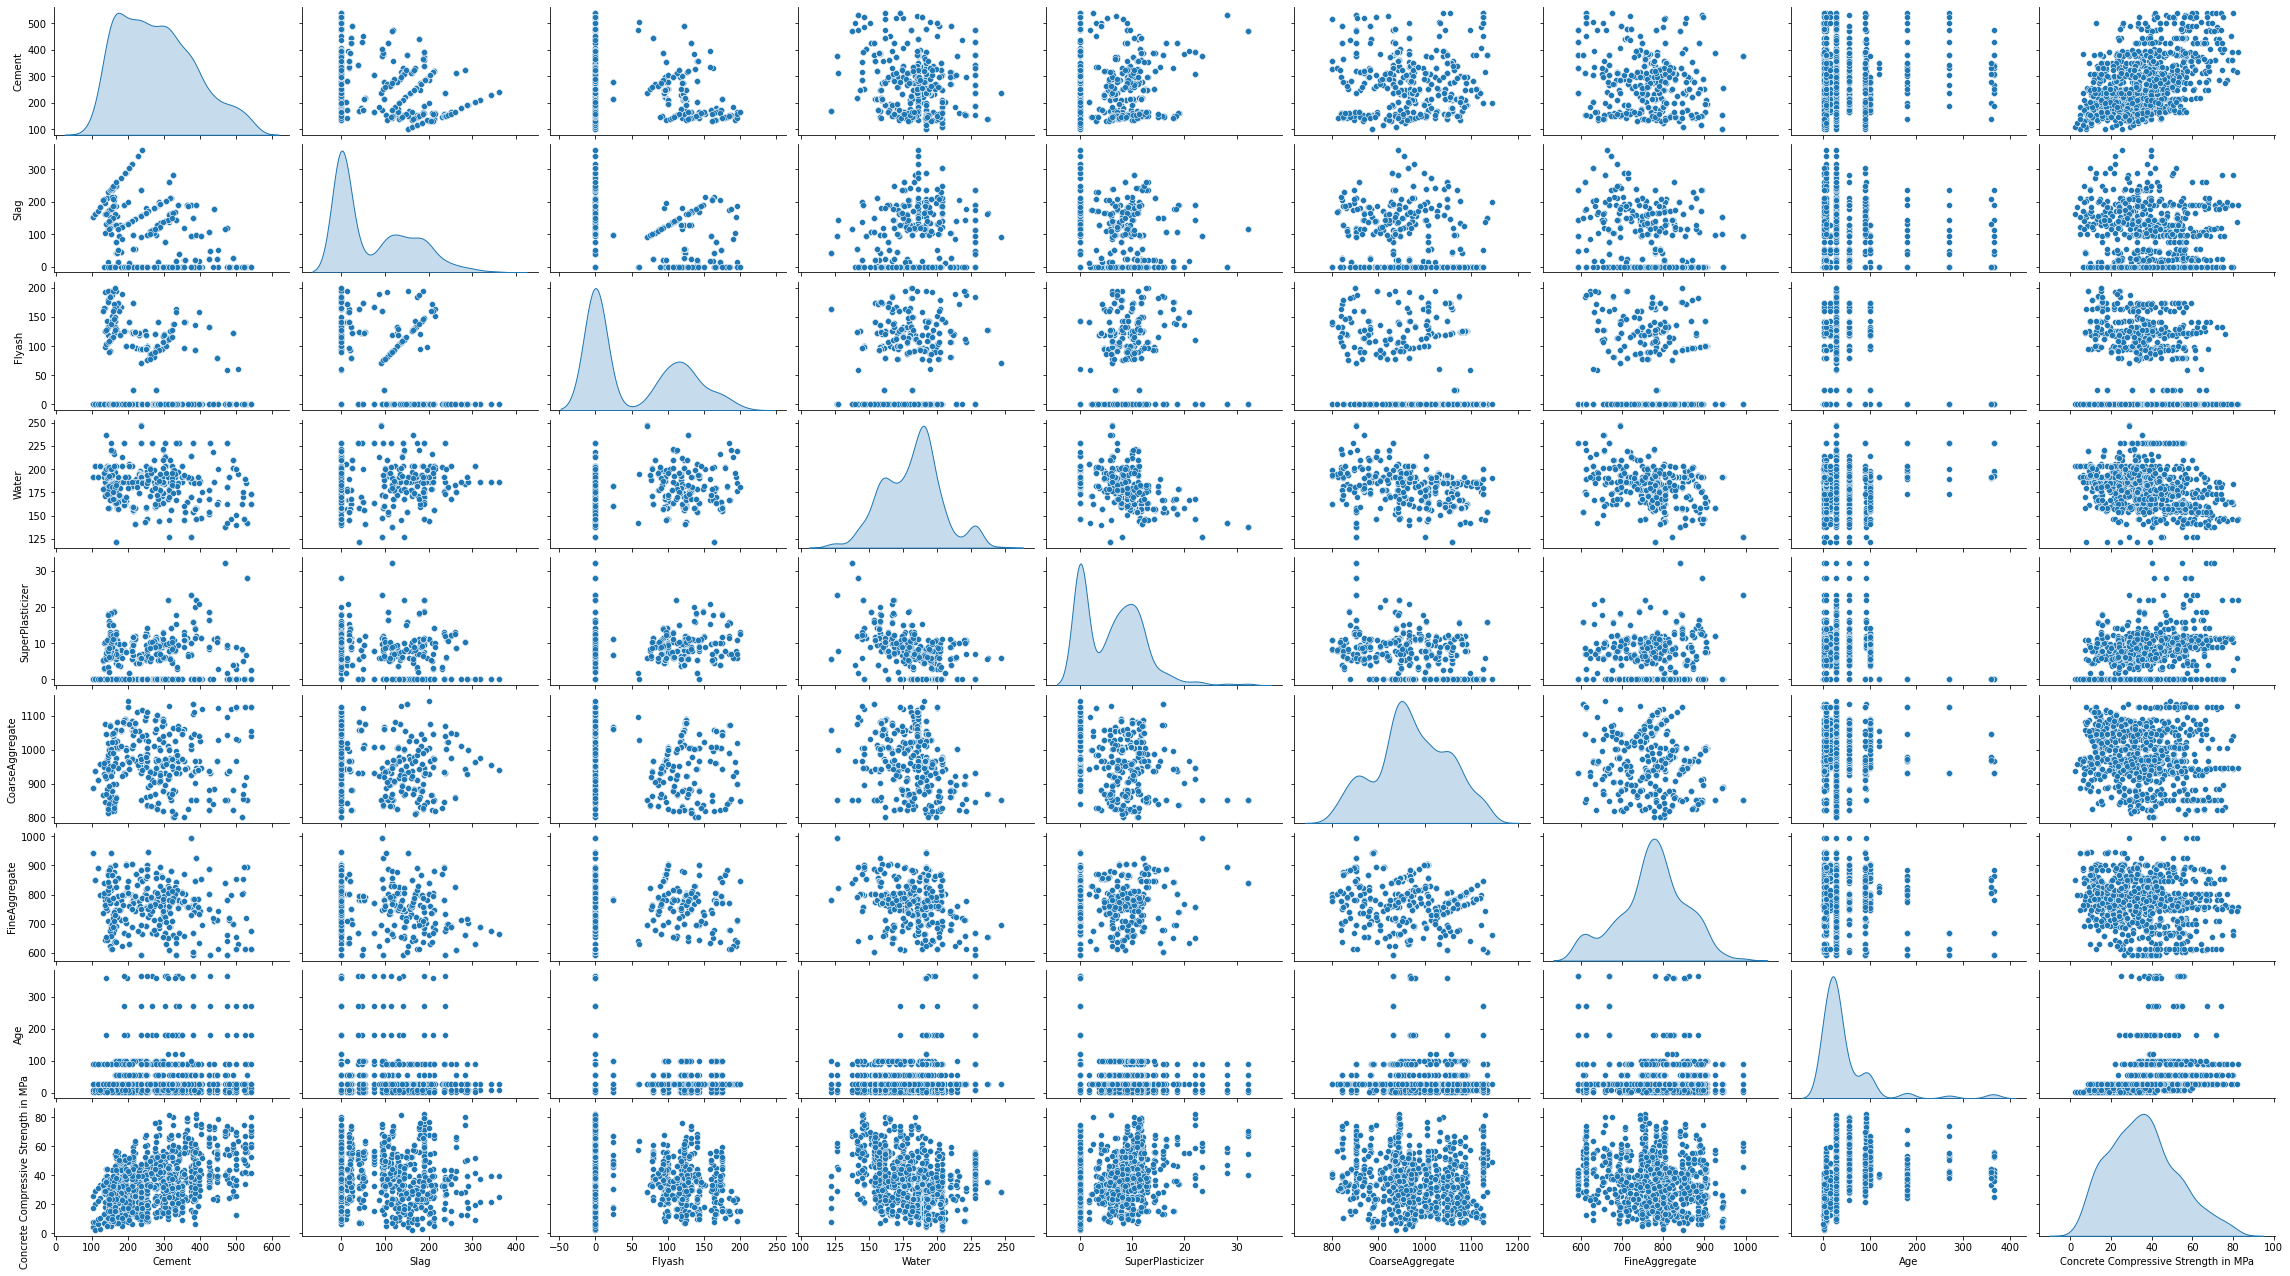

In [163]:
sns.pairplot(cd,height=2.0, aspect=1.8,diag_kind='kde')

C:\Users\sushant\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sushant\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sushant\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

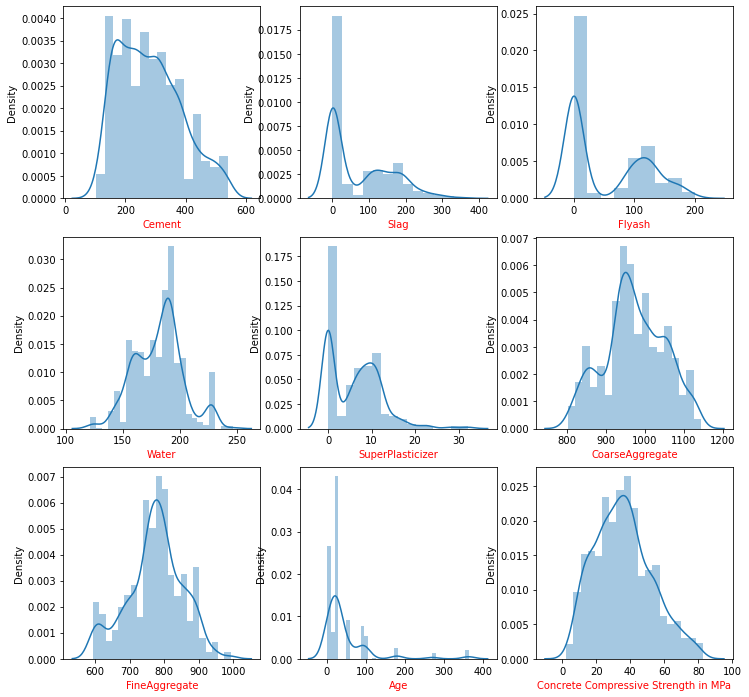

In [164]:
plt.figure(figsize=(12,12),facecolor='white')
plotnumber=1
for column in cd.columns:
    plt.subplot(3,3,plotnumber)
    sns.distplot(cd[column])
    plt.xlabel(column,fontsize=10,color='r')
    plotnumber+=1
plt.show()

In [165]:
x = cd.drop('Concrete Compressive Strength in MPa', axis=1)

In [166]:
x

,Cement,Slag,Flyash,Water,SuperPlasticizer,CoarseAggregate,FineAggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [167]:
y = cd['Concrete Compressive Strength in MPa']

y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: Concrete Compressive Strength in MPa, Length: 1030, dtype: float64

In [168]:
for column in x.columns:
    x[column]+=1
    x[column]= np.log(x[column])
x

,Cement,Slag,Flyash,Water,SuperPlasticizer,CoarseAggregate,FineAggregate,Age
0,6.293419,0.000000,0.000000,5.093750,1.252763,6.947937,6.517671,3.367296
1,6.293419,0.000000,0.000000,5.093750,1.252763,6.962243,6.517671,3.367296
2,5.809643,4.966335,0.000000,5.433722,0.000000,6.838405,6.388561,5.602119
3,5.809643,4.966335,0.000000,5.433722,0.000000,6.838405,6.388561,5.902633
4,5.296315,4.893352,0.000000,5.262690,0.000000,6.886940,6.717200,5.888878
...,...,...,...,...,...,...,...,...
1025,5.625461,4.762174,4.514151,5.196285,2.292535,6.769757,6.645481,3.367296
1026,5.778271,0.000000,4.758749,5.283204,2.433613,6.707962,6.702452,3.367296
1027,5.007296,4.944495,4.696837,5.266311,1.960095,6.795034,6.660575,3.367296
1028,5.075799,5.234845,0.000000,5.173887,2.509599,6.898311,6.671906,3.367296


C:\Users\sushant\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sushant\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sushant\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

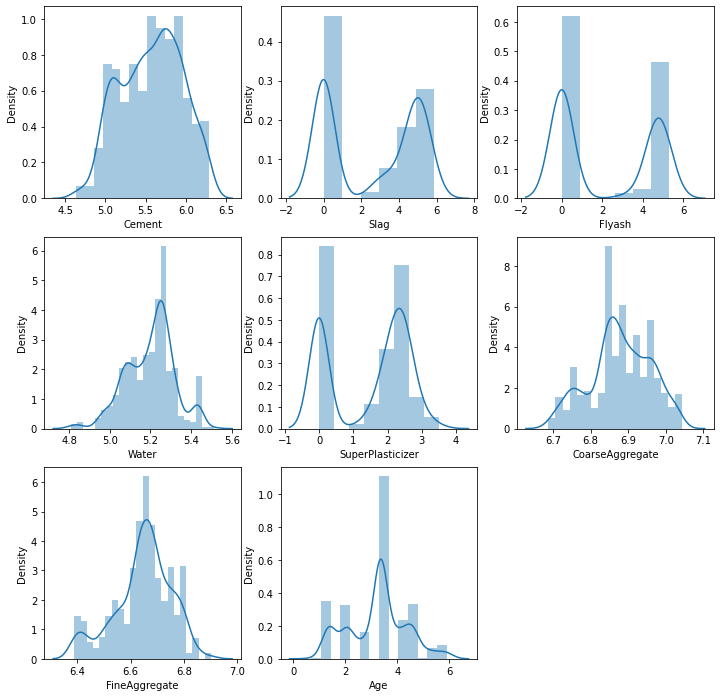

In [169]:
plt.figure(figsize=(12,12),facecolor='white')
plotnumber = 1
for column in x.columns:
    plt.subplot(3,3,plotnumber)
    sns.distplot(x[column])
    plt.xlabel(column)
    plotnumber+=1
plt.show()

C:\Users\sushant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sushant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sushant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sushant\anaconda

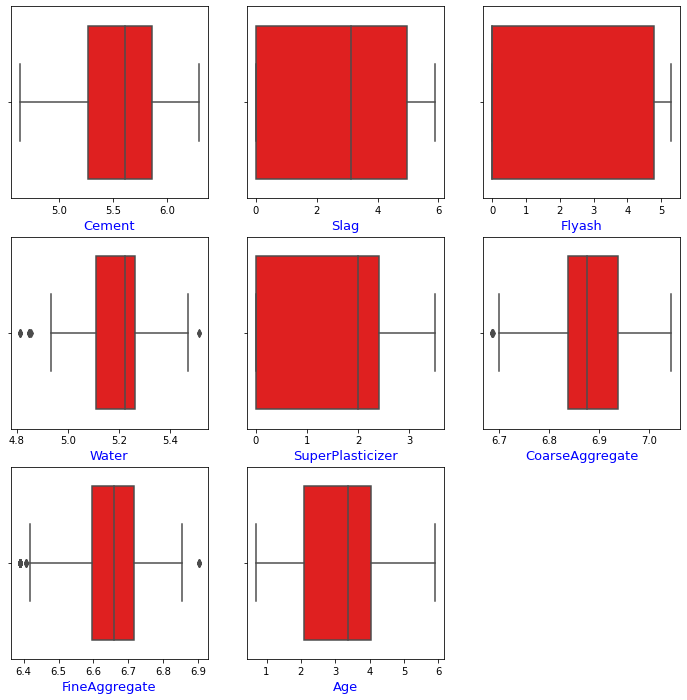

In [170]:
plt.figure(figsize=(12,12),facecolor='white')
plotnumber=1
for column in x.columns:
    plt.subplot(3,3,plotnumber)
    sns.boxplot(x[column],color='r')
    plt.xlabel(column,fontsize=13, c='b')
    plotnumber+=1
plt.show()

C:\Users\sushant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sushant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sushant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sushant

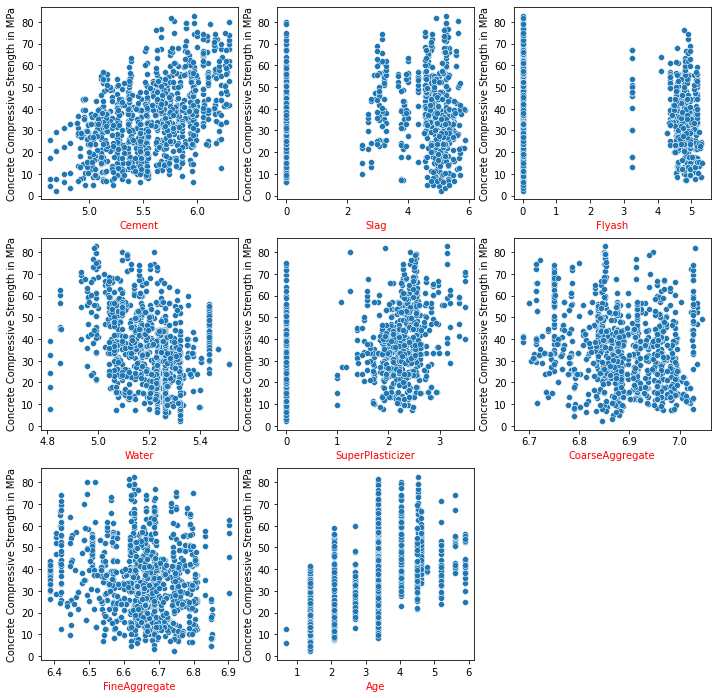

In [171]:
plt.figure(figsize=(12,12),facecolor='white')
plotnumber=1
for column in x.columns:
    plt.subplot(3,3,plotnumber)
    sns.scatterplot(x[column],y)
    plt.xlabel(column, c='r')
    plotnumber+=1
plt.show()

<AxesSubplot:>

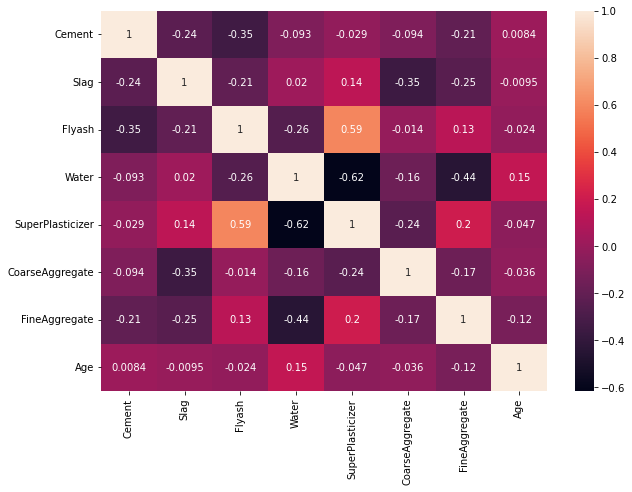

In [172]:
plt.figure(figsize=(10,7),facecolor='white')
sns.heatmap(x.corr(), annot=True)

In [173]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=50)
x_train

,Cement,Slag,Flyash,Water,SuperPlasticizer,CoarseAggregate,FineAggregate,Age
339,5.697764,0.000000,4.774913,5.169347,2.351375,6.931276,6.626055,1.386294
809,5.533389,0.000000,0.000000,5.225747,0.000000,7.013915,6.665684,3.367296
785,5.805135,0.000000,0.000000,5.262690,0.000000,6.886532,6.716595,2.079442
939,4.989752,5.444580,0.000000,5.315666,1.481605,6.719013,6.771706,3.367296
722,5.739793,0.000000,0.000000,5.262690,0.000000,6.920672,6.722630,2.079442
...,...,...,...,...,...,...,...,...
1027,5.007296,4.944495,4.696837,5.266311,1.960095,6.795034,6.660575,3.367296
229,5.369242,4.596129,3.238678,5.207845,2.066863,6.972419,6.667466,1.386294
70,5.926926,5.248076,0.000000,5.142248,2.406945,6.832061,6.630288,1.386294
132,5.896054,5.247024,0.000000,5.111385,2.533697,6.851925,6.629099,3.367296


In [174]:
x_test

,Cement,Slag,Flyash,Water,SuperPlasticizer,CoarseAggregate,FineAggregate,Age
500,6.198479,3.295837,4.820282,5.308268,1.589235,6.712956,6.551080,3.367296
611,5.627621,0.000000,0.000000,5.257495,0.000000,6.876265,6.753438,2.708050
684,5.262690,5.666427,0.000000,5.262690,0.000000,6.836044,6.575215,4.510860
936,5.471850,4.529368,4.283587,5.513025,1.945910,6.749814,6.545924,3.367296
279,5.531015,0.000000,4.781641,5.244389,2.001480,6.936731,6.631606,1.386294
...,...,...,...,...,...,...,...,...
624,5.730100,0.000000,0.000000,5.267858,0.000000,6.876265,6.700731,3.367296
267,5.361292,0.000000,4.834693,5.075174,2.174752,6.990625,6.685237,4.043051
162,5.926926,5.248076,0.000000,5.142248,2.406945,6.832061,6.630288,4.521789
274,5.531015,0.000000,4.781641,5.244389,1.916923,6.936731,6.631606,1.386294


In [175]:
y_train

339     21.91
809     19.69
785     16.26
939     32.72
722     17.24
        ...  
1027    23.70
229     18.00
70      34.40
132     71.30
109     55.90
Name: Concrete Compressive Strength in MPa, Length: 721, dtype: float64

In [176]:
y_test

500    57.92
611    21.26
684    50.73
936    28.63
279    13.12
       ...  
624    27.53
267    45.08
162    64.90
274    17.22
551     8.20
Name: Concrete Compressive Strength in MPa, Length: 309, dtype: float64

In [177]:
scalar = StandardScaler()
X_train = scalar.fit(x_train)
X_train = scalar.transform(x_train)
X_test = scalar.transform(x_test)
X_train= pd.DataFrame(X_train,columns=x_train.columns)
X_train

,Cement,Slag,Flyash,Water,SuperPlasticizer,CoarseAggregate,FineAggregate,Age
0,0.326617,-1.093448,1.118591,-0.222598,0.746340,0.662460,-0.177282,-1.675226
1,-0.111004,-1.093448,-0.889275,0.247494,-1.299635,1.682817,0.188523,0.108236
2,0.612473,-1.093448,-0.889275,0.555419,-1.299635,0.109988,0.658477,-1.051197
3,-1.558348,1.163692,-0.889275,0.996973,-0.010463,-1.958389,1.167206,0.108236
4,0.438511,-1.093448,-0.889275,0.555419,-1.299635,0.531518,0.714186,-1.051197
...,...,...,...,...,...,...,...,...
716,-1.511639,0.956374,1.085760,0.585595,0.405880,-1.019743,0.141367,0.108236
717,-0.548020,0.811953,0.472600,0.098287,0.498781,1.170450,0.204971,-1.675226
718,0.936722,1.082228,-0.889275,-0.448467,0.794693,-0.562564,-0.138215,-1.675226
719,0.854531,1.081792,-0.889275,-0.705710,0.904982,-0.317301,-0.149186,0.108236


In [178]:
X_test= pd.DataFrame(X_test,columns=x_test.columns)
X_test


,Cement,Slag,Flyash,Water,SuperPlasticizer,CoarseAggregate,FineAggregate,Age
0,1.659685,0.272895,1.137669,0.935308,0.083188,-2.033175,-0.869367,0.108236
1,0.139872,-1.093448,-0.889275,0.512120,-1.299635,-0.016780,0.998572,-0.485271
2,-0.831696,1.255662,-0.889275,0.555419,-1.299635,-0.513385,-0.646580,1.137768
3,-0.274841,0.784276,0.911987,2.641966,0.393538,-1.578085,-0.916962,0.108236
4,-0.117325,-1.093448,1.121420,0.402878,0.441890,0.729812,-0.126040,-1.675226
...,...,...,...,...,...,...,...,...
304,0.412704,-1.093448,-0.889275,0.598494,-1.299635,-0.016780,0.512042,0.108236
305,-0.569184,-1.093448,1.143729,-1.007532,0.592657,1.395242,0.369013,0.716608
306,0.936722,1.082228,-0.889275,-0.448467,0.794693,-0.562564,-0.138215,1.147607
307,-0.117325,-1.093448,1.121420,0.402878,0.368315,0.729812,-0.126040,-1.675226


In [179]:
print(X_train.mean())

Cement             -8.490665e-16
Slag                5.481822e-17
Flyash             -5.820587e-17
Water               2.628195e-15
SuperPlasticizer    3.982020e-16
CoarseAggregate    -3.666816e-15
FineAggregate       2.530723e-16
Age                 3.122791e-16
dtype: float64


In [180]:
print(X_train.var())

Cement              1.001389
Slag                1.001389
Flyash              1.001389
Water               1.001389
SuperPlasticizer    1.001389
CoarseAggregate     1.001389
FineAggregate       1.001389
Age                 1.001389
dtype: float64


In [181]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR, LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor

In [182]:
models = {
    "                     Linear Regression" : LinearRegression(),
    "                 L2 (Ridge) Regression" : Ridge(),
    "Support Vector Machine (Linear Kernel)" : LinearSVR(),
    "   Support Vector Machine (RBF Kernel)" : SVR(),
    "                         Decision Tree" : DecisionTreeRegressor(),
    "                        Neural Network" : MLPRegressor(),
    "                         Random Forest" : RandomForestRegressor(),
    "                     Gradient Boosting" : GradientBoostingRegressor(),
    "                              AdaBoost" : AdaBoostRegressor()
}

In [183]:
for name,model in models.items():
    model.fit(X_train,y_train)
    print('model trained with. {}'.format(name))

model trained with.                      Linear Regression
model trained with.                  L2 (Ridge) Regression
model trained with. Support Vector Machine (Linear Kernel)
model trained with.    Support Vector Machine (RBF Kernel)
model trained with.                          Decision Tree


C:\Users\sushant\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


model trained with.                         Neural Network
model trained with.                          Random Forest
model trained with.                      Gradient Boosting
model trained with.                               AdaBoost


In [184]:
from sklearn.metrics import r2_score

In [185]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    score = r2_score(y_test,y_pred)
    print(score)

0.8155533922279985
0.8155169281991148
0.8099375869771418
0.7928382160811263
0.8405737443767517
0.7468015292037762
0.9067010446448216
0.9036730925812452
0.77741714186199


In [186]:
best_model = GradientBoostingRegressor()
best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = r2_score(y_test,y_pred)
print ('score before hyperparameter tuning {}'.format(score))

score before hyperparameter tuning 0.9037347956590457


In [187]:
param = {
    'learning_rate' : [0.01, 0.1, 1.0],
    'n_estimators' : [100, 150, 200],
    'max_depth' : [3, 4, 5]
}

In [188]:
clf = GridSearchCV(estimator=best_model,param_grid=param)
clf.fit(X_train,y_train)
#best_accuracy = clf.best_score_
best_param = clf.best_params_

In [189]:
#print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print(best_param)

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}


In [190]:
y_pred = clf.predict(X_test)
score = r2_score(y_test,y_pred)
print ('score after hyperparameter tuning {}'.format(score))

score after hyperparameter tuning 0.9362243840553289
